In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D

import nibabel as nib

In [31]:
np.linalg.norm(fibers[0][1:] - fibers[0][:-1], axis=1).sum()

104.83634

/local/home/vwegmayr/miniconda2/envs/thesis/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys
/local/home/vwegmayr/miniconda2/envs/thesis/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


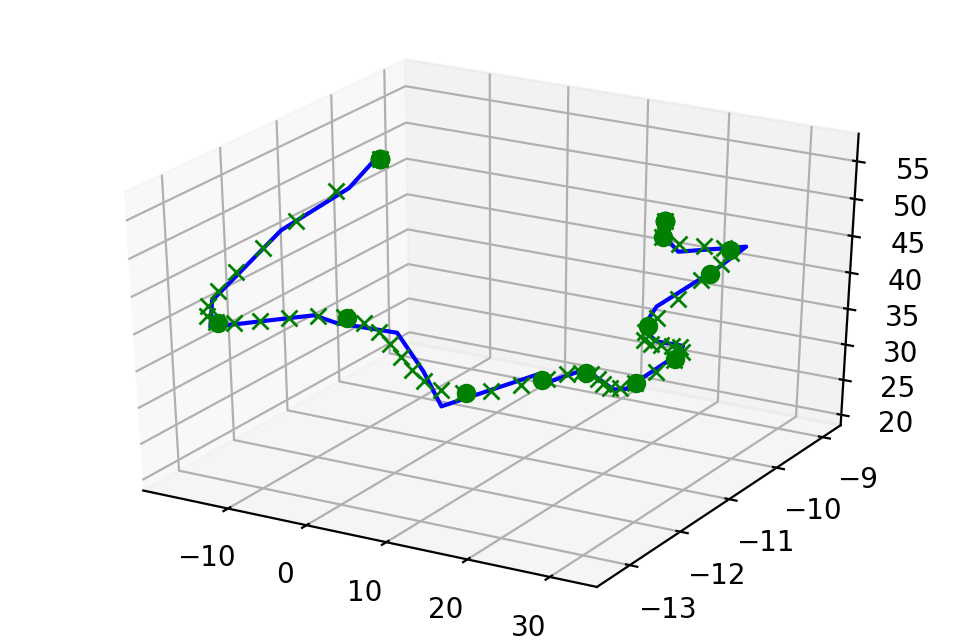

In [141]:
# 3D example

n_pts = np.linalg.norm(fibers[0][1:] - fibers[0][:-1], axis=1).sum().round()/2

tck, u = interpolate.splprep(fibers[0].T.reshape(3,-1), s=5)
x_knots, y_knots, z_knots = interpolate.splev(tck[0], tck)
u_fine = np.linspace(0,1,n_pts)
x_fine, y_fine, z_fine = interpolate.splev(u_fine, tck)

fig2 = plt.figure(dpi=200)

ax3d = fig2.add_subplot(111, projection='3d')
ax3d.plot(x_true, y_true, z_true, 'b')
ax3d.plot(x_knots, y_knots, z_knots, 'go')
ax3d.plot(x_fine, y_fine, z_fine, 'xg')
fig2.show()
plt.show()

In [7]:
config = dict(
    tck_path = "CC.tck",
)

In [77]:
fibers = nib.streamlines.load(config["tck_path"]).tractogram.streamlines

In [135]:
def fiber_geometry(fiber, n_pts="auto", smoothing=1):
    """
    fiber: [[x1,y1,z1],...,[xn,yn,zn]]
    """
    
    tck, u = interpolate.splprep(fiber.T.reshape(3, -1), s=smoothing)

    if n_pts == "auto":
        flen = np.linalg.norm(fiber[1:] - fiber[:-1], axis=1).sum()
        n_pts = int(flen/2) # if units are in mm, pts are on average 2 mm apart

    pts = np.linspace(0, 1, n_pts)

    r = np.dstack(interpolate.splev(pts, tck))[0]
    r1 = np.dstack(interpolate.splev(pts, tck, der=1))[0]
    r2 = np.dstack(interpolate.splev(pts, tck, der=2))[0]
    r3 = np.dstack(interpolate.splev(pts, tck, der=3))[0]

    r1xr2 = np.cross(r1, r2)

    t = r1
    t /= np.linalg.norm(t, axis=1, keepdims=True)

    b = r1xr2
    b /= np.linalg.norm(b, axis=1, keepdims=True)

    n = np.cross(b, t)

    k = np.linalg.norm(r1xr2, axis=1, keepdims=True)
    k /= np.linalg.norm(r1, axis=1, keepdims=True)**3

    tau = np.sum(r1xr2 * r3, axis=1, keepdims=True)
    tau /= np.linalg.norm(r1xr2, axis=1, keepdims=True)**2
    
    return np.hstack([r,t,b,n,k,tau])

In [143]:
fiber_geometry(fibers[0], smoothing=5)[-1,:3]

array([ 31.03097784, -11.71767214,  57.82163123])

In [149]:
fiber_geometry(fibers[0][:4], smoothing=5, n_pts=4)

array([[-9.60865784e+00, -1.08603973e+01,  5.49690399e+01,
        -9.57659816e-02,  1.72690746e-01, -9.80309534e-01,
        -9.85545176e-01,  1.21814911e-01,  1.17736291e-01,
        -1.39748286e-01, -9.77414464e-01, -1.58528807e-01,
         1.00000000e+00,  1.84065290e+01],
       [-1.03578647e+01, -1.25044662e+01,  5.13636558e+01,
        -2.46092011e-01, -7.29210591e-01, -6.38506567e-01,
        -8.73013546e-01,  4.52940935e-01, -1.80808897e-01,
        -4.21053525e-01, -5.12929258e-01,  7.48075869e-01,
         1.00000000e+00,  9.09285212e+01],
       [-1.18356340e+01, -1.52294553e+01,  4.85682535e+01,
        -4.83356702e-01, -3.26182447e-01, -8.12386183e-01,
         8.60708174e-01, -7.63646968e-03, -5.09041378e-01,
        -1.59836600e-01,  9.45275989e-01, -2.84439037e-01,
         1.00000000e+00,  2.78407671e+01],
       [-1.43139343e+01, -1.31517487e+01,  4.40090637e+01,
        -3.22496637e-01,  6.76706402e-01, -6.61864310e-01,
         8.42608752e-01, -1.13353991e-01, -5.

In [146]:
fibers[0][:4]

array([[ -9.608658, -10.860397,  54.96904 ],
       [ -9.950363, -11.288567,  52.716316],
       [-10.341171, -12.454872,  51.407303],
       [-14.313934, -13.151749,  44.009064]], dtype=float32)